# Investigation on the Seasonality

Evaluation of the impact of seasonality for dimension reduction.

**Load Data**

In [1]:
import sys
sys.path.append('..')
from utils import *
file_path = '../../QuickStart/Data/Electricity/residential_all_hour.pkl'

/home/nvlaminc/Documents/Projects/Ariac/building/TRAIL_workshops/venv_workshop2022/lib64/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
x = np.asarray(pd.read_pickle(file_path))
print(x.shape)

(3639, 12864)


## Introduction - Variation at various levels

### Mean Evolution for Weeks 

(7, 24)


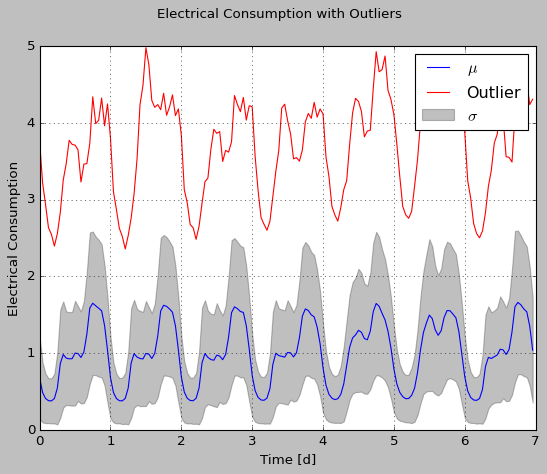

In [5]:
fig = plt.figure()
x_ = x[:, :7*24*76].reshape(len(x), -1, 7, 24)
print(x_.mean(1).mean(0).shape)
plt.fill_between(np.arange(24*7)/24, x_.mean(1).mean(0).flatten() -  x_.mean(1).std(0).flatten(),
                 x_.mean(1).mean(0).flatten() + x_.mean(1).std(0).flatten(), 
                 color='black', alpha=0.25, label=r'$\sigma$')
plt.plot(np.arange(24*7)/24, x_.mean(1).mean(0).flatten(), label=r'$\mu$')
plt.plot(np.arange(24*7)/24, x_[1152].reshape(1, -1 , 7*24).mean(1).mean(0), color='red', label='Outlier')
plt.grid()
plt.xlabel('Time [d]')
plt.ylabel('Electrical Consumption')
plt.suptitle('Electrical Consumption with Outliers')
plt.legend()
plt.savefig('Outliers_1_all_week.png', dpi=600)
plt.show()

### Mean Evolution for Months (i.e. 4 four weeks)

(28, 24)


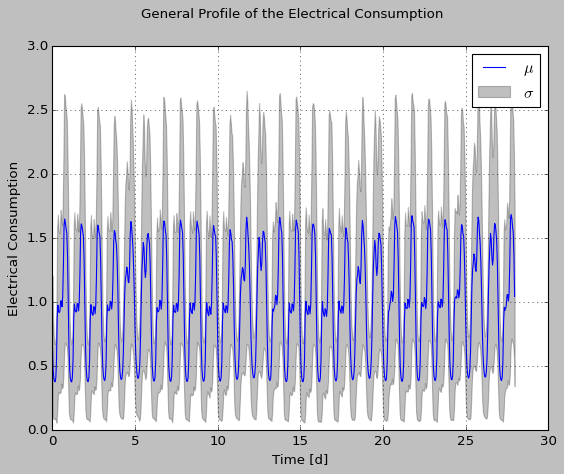

In [8]:
fig = plt.figure()
x_ = x[:, :7*24*76].reshape(len(x), -1, 7*4, 24)
print(x_.mean(1).mean(0).shape)
plt.fill_between(np.arange(24*7*4)/24, x_.mean(1).mean(0).flatten() -  x_.mean(1).std(0).flatten(),
                 x_.mean(1).mean(0).flatten() + x_.mean(1).std(0).flatten(), 
                 color='black', alpha=0.25, label=r'$\sigma$')
plt.plot(np.arange(24*7*4)/24, x_.mean(1).mean(0).flatten(), label=r'$\mu$')
plt.grid()
plt.xlabel('Time [d]')
plt.ylabel('Electrical Consumption')
plt.suptitle('General Profile of the Electrical Consumption')
plt.legend()
plt.show()

### Mean Evolution for Seasons

(84, 24)


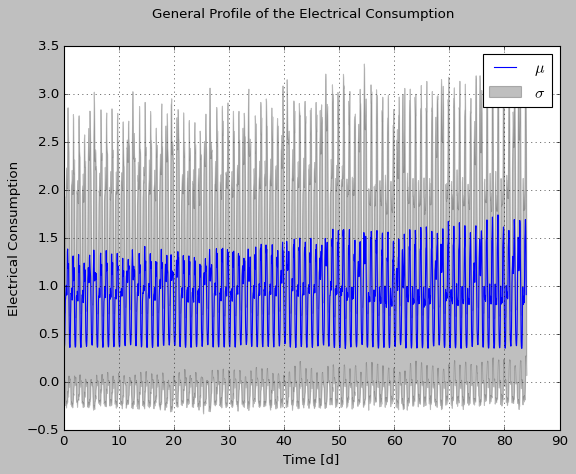

In [9]:
fig = plt.figure()
x_ = x[:, :24*7*4*3].reshape(len(x), -1, 7*4*3, 24)
print(x_.mean(1).mean(0).shape)
plt.fill_between(np.arange(24*7*4*3)/24, x_.mean(1).mean(0).flatten() -  x_.mean(1).std(0).flatten(),
                 x_.mean(1).mean(0).flatten() + x_.mean(1).std(0).flatten(), 
                 color='black', alpha=0.25, label=r'$\sigma$')
plt.plot(np.arange(24*7*4*3)/24, x_.mean(1).mean(0).flatten(), label=r'$\mu$')
plt.grid()
plt.xlabel('Time [d]')
plt.ylabel('Electrical Consumption')
plt.suptitle('General Profile of the Electrical Consumption')
plt.legend()
plt.show()

### Mean Evolution for the whole dataset

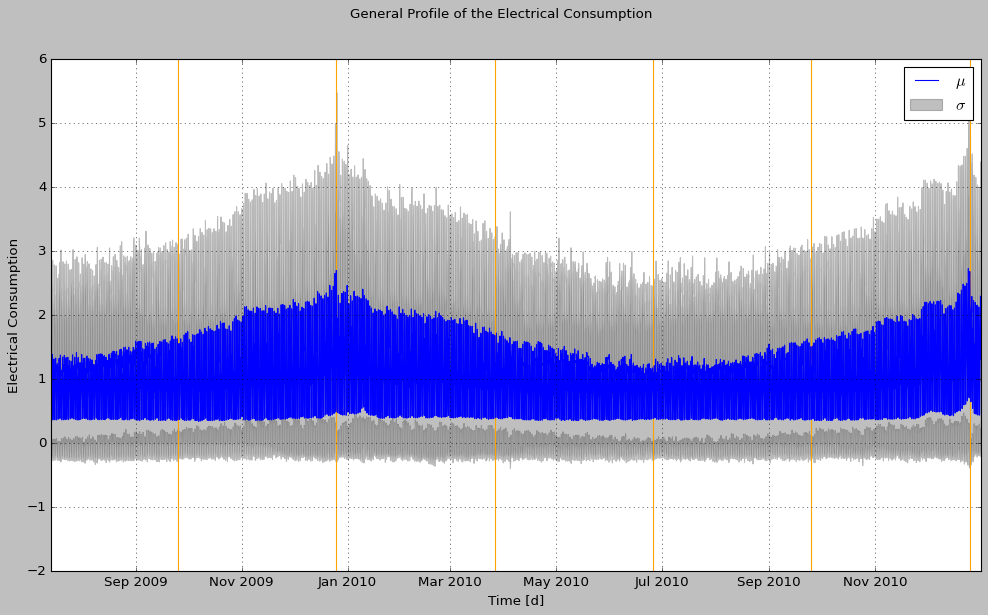

In [24]:
l_period = 24*365//4
b_id = 1758
t = pd.date_range(start="2009-07-14" , end="2010-12-31 23:00:00", freq="60T", name='date_time')
fig = plt.figure(figsize=(15, 8))
#plt.fill_between(np.arange(x.shape[-1])/24, x.mean(0) -  x.std(0),
#                 x.mean(0) + x.std(0), color='black', alpha=0.25, label=r'$\sigma$')
#plt.plot(np.arange(x.shape[-1])/24, x.mean(0), label=r'$\mu$')
plt.fill_between(t, x.mean(0) -  x.std(0),
                 x.mean(0) + x.std(0), color='black', alpha=0.25, label=r'$\sigma$')
plt.plot(t, x.mean(0), label=r'$\mu$')
#period = 365/4
#for i in range(int((x.shape[1]/24)//(period)) +1):
#    plt.vlines(72.75 + i*period, -2, 6, color='orange')
#Season 0 (26 Juin- 25 Sept)
plt.vlines(t[b_id], -2, 6, color='orange')
#Season 1 (25 Sept - 25 Dec)
plt.vlines(t[b_id + l_period], -2, 6, color='orange')
plt.vlines(t[b_id + 4*l_period], -2, 6, color='orange')
plt.vlines(t[b_id + 5*l_period], -2, 6, color='orange')
#Season 2 (25 Dec - 26 Mars)
plt.vlines(t[b_id + 2*l_period], -2, 6, color='orange')
#Season 3 (26 Mars - 26 Juin)
plt.vlines(t[b_id + 3*l_period], -2, 6, color='orange')

plt.grid()
plt.xlabel('Time [d]')
plt.ylabel('Electrical Consumption')
plt.suptitle('General Profile of the Electrical Consumption')
plt.legend()
plt.show()

## Smart Temporal Reshape

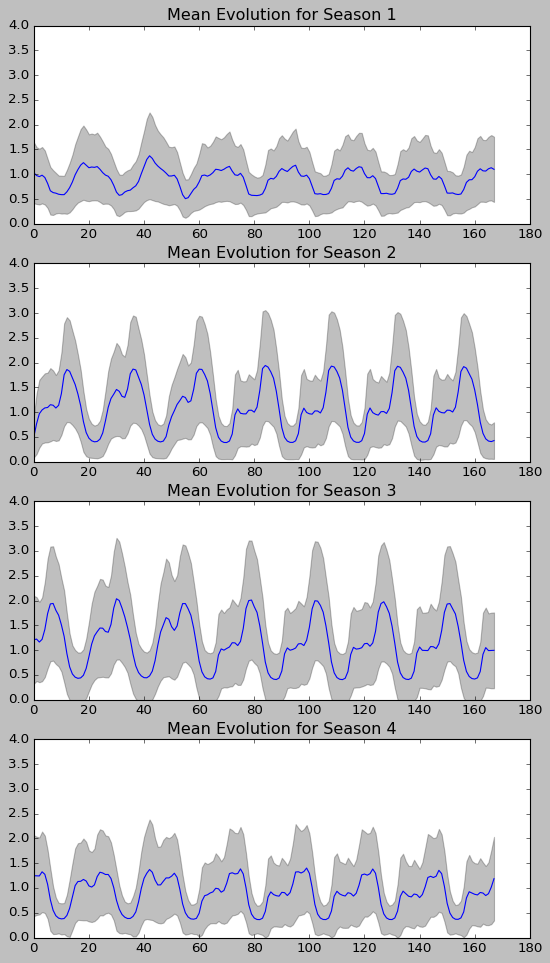

In [19]:
#Four seasons of 52/4 = 13 weeks
l_period = 24*365//4
b_id = 1758
season = np.zeros((x.shape[0], 4, l_period))
season[:, 0, l_period-b_id:] = 0.5*(x[:, :b_id] + x[:, 8328-b_id:8328])
season[:, 0, :l_period-b_id] = x[:, 6138:6138+l_period-b_id]
season[:, 1] = 0.5*(x[:, b_id:b_id+l_period] + x[:, b_id+4*l_period:b_id+5*l_period])
season[:, 2] =  x[:, b_id+l_period:b_id+2*l_period]
season[:, 3] =  x[:, b_id+2*l_period:b_id+3*l_period]
season = season[:, :, :7*24*13].reshape((season.shape[0], season.shape[1], -1, 7, 24))
fig, ax = plt.subplots(4)
plt.subplots_adjust(top=2)
for i in range(4):
    ax[i].fill_between(np.arange(24*7), 
                       season[:, i].mean(1).mean(0).flatten() - season[:, i].mean(1).std(0).flatten(),
                       season[:, i].mean(1).mean(0).flatten() + season[:, i].mean(1).std(0).flatten(), 
                       color='black', alpha=0.25, label=r'$\sigma$')
    ax[i].plot(season[:, i].mean(1).mean(0).flatten())
    ax[i].set_ylim([0, 4])
    ax[i].set_title(f'Mean Evolution for Season {i+1}') 
plt.show()

## Reduction Dimension on seasons signals

In [6]:
x_season = seasons_reshape(x)
print(x_season.shape)
#672 = 4*7*24

(3639, 672)


In [13]:
from sklearn.metrics import silhouette_score, calinski_harabasz_scorehe seasonality of the data was studied aside of the other experiments to see if it could yield better reduced
features for the clustering. The figure ?? gives an insight into the mean consumption profile
scores = []

In [33]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(x_season)
ch_x_base = calinski_harabasz_score(x, kmeans.predict(x_season))
sc_x_base = silhouette_score(x, kmeans.predict(x_season))

In [34]:
x_pca = PCA(n_components=10).fit_transform(x_season)
kmeans = KMeans(n_clusters=4, random_state=0).fit(x_pca)
ch_x_pca = calinski_harabasz_score(x, kmeans.predict(x_pca))
sc_x_pca = silhouette_score(x, kmeans.predict(x_pca))

In [35]:
import pywt

def multi_level_dwt(x, wav_func='coif5', level=None):
    c = pywt.wavedec(x, wavelet=wav_func, level=level)
    return c[0]

def evaluate_wavelet_function(x, x_season, wav_func='coif5', n_cluster=4, period='D'):
    level = []
    scores = []
    for l in tqdm(np.arange(pywt.dwt_max_level(data_len=x_season.shape[1], filter_len=pywt.Wavelet(wav_func).dec_len))):
        x_dwt = multi_level_dwt(x_season, wav_func=wav_func, level=l)
        kmeans = KMeans(n_clusters=n_cluster, random_state=0).fit(x_dwt)
        # Calculate CH and sil for all time points at once (high-dimensional)
        CH = calinski_harabasz_score(x, kmeans.predict(x_dwt))
        sil = silhouette_score(x, kmeans.predict(x_dwt))
        scores.append([CH, sil])
        level.append(l)
    return np.array(scores), np.array(level)

In [36]:
metrics_alone = {}
wave_func = ['coif5', 'sym10', 'db8']
for k in wave_func:
    s, l = evaluate_wavelet_function(x, x_season, wav_func=k)
    metrics_alone[k] = s

100%|██████████| 5/5 [00:20<00:00,  4.13s/it]


In [37]:
import pywt
from sklearn.decomposition import PCA

def multi_level_dwt(x, wav_func='coif5', level=None):
    c = pywt.wavedec(x, wavelet=wav_func, level=level)
    return c[0]

def evaluate_wavelet_function(x, wav_func='coif5', n_cluster=4):
    level = []
    scores = []
    for l in np.arange(pywt.dwt_max_level(data_len=x.shape[1], filter_len=pywt.Wavelet(wav_func).dec_len)):
        x_dwt = multi_level_dwt(x, wav_func=wav_func, level=l)
        kmeans = KMeans(n_clusters=n_cluster, random_state=0).fit(x_dwt)
        scores.append([calinski_harabasz_score(x, kmeans.predict(x_dwt)), silhouette_score(x, kmeans.predict(x_dwt))])
        level.append(l)
    return np.array(scores), np.array(level)

def ver_wavfunc(x, wav_func='coif5'):
    fig = plt.figure()
    for l in tqdm(np.arange(pywt.dwt_max_level(data_len=x.shape[1], filter_len=pywt.Wavelet(wav_func).dec_len))):
        x_dwt = multi_level_dwt(x, wav_func=wav_func, level=l)
        pca = PCA(n_components=np.min([1000, x_dwt.shape[-1]]))
        pca.fit(x_dwt)
        plt.plot(1 - pca.explained_variance_ratio_[:15], label=f'{wav_func} - level {l+1}')
    ax = plt.gca()
    ax.set_ylim([0.875, 1.005])
    plt.grid()
    plt.ylabel('Explained Variance Ratio')
    plt.xlabel('# of Components')
    plt.suptitle(f'Variance Explained Ratio for Level for {wav_func} function')
    plt.legend()
    plt.show()
    
def evaluate_pca_wavelet(x, x_season, wav_func='coif5', n_cluster=4, n_components=10):
    level = []
    scores = []
    for l in tqdm(np.arange(pywt.dwt_max_level(data_len=x_season.shape[1], filter_len=pywt.Wavelet(wav_func).dec_len))):
        x_dwt = multi_level_dwt(x_season, wav_func=wav_func, level=l)
        x_dwt = PCA(n_components=n_components).fit_transform(x_dwt)
        kmeans = KMeans(n_clusters=n_cluster, random_state=0).fit(x_dwt)
        scores.append([calinski_harabasz_score(x, kmeans.predict(x_dwt)), silhouette_score(x, kmeans.predict(x_dwt))])
        level.append(l)
    return np.array(scores), np.array(level)

In [38]:
metrics_pca = {}
wave_func = ['coif5', 'sym10', 'db8']
for k in wave_func:
    s, l = evaluate_pca_wavelet(x, x_season, wav_func=k)
    metrics_pca[k] = s

100%|██████████| 5/5 [00:19<00:00,  3.97s/it]


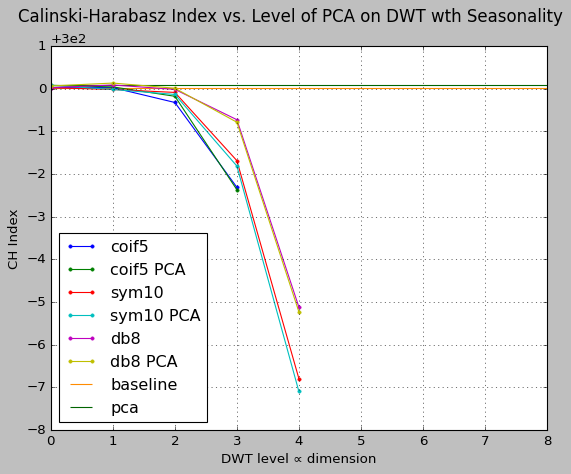

In [40]:
fig = plt.figure()
plt.style.use('classic')
for k in metrics_alone.keys():
    plt.plot(np.array(metrics_alone[k])[:, 0], '.-', label=k)
    plt.plot(np.array(metrics_pca[k])[:, 0], '.-', label=k+' PCA')
plt.hlines(ch_x_base, 0, 8, color='darkorange', label='baseline')
plt.hlines(ch_x_pca, 0, 8, color='darkgreen', label='pca')
plt.grid()
plt.suptitle('Calinski-Harabasz Index vs. Level of PCA on DWT wth Seasonality', size=15)
plt.ylabel('CH Index')
plt.xlabel('DWT level ∝ dimension')
plt.legend(loc=3)
ax = plt.gca()
plt.savefig('ch_dwt_seasonality.svg', dpi = 600)

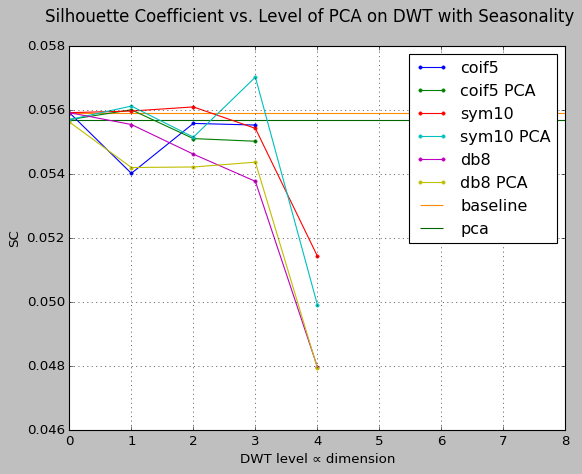

In [41]:
fig = plt.figure()
plt.style.use('classic')
for k in metrics_alone.keys():
    plt.plot(np.array(metrics_alone[k])[:, 1], '.-', label=k)
    plt.plot(np.array(metrics_pca[k])[:, 1], '.-', label=k+' PCA')
plt.hlines(sc_x_base, 0, 8, color='darkorange', label='baseline')
plt.hlines(sc_x_pca, 0, 8, color='darkgreen', label='pca')
plt.grid()
plt.suptitle('Silhouette Coefficient vs. Level of PCA on DWT with Seasonality', size=15)
plt.ylabel('SC')
plt.xlabel('DWT level ∝ dimension')
plt.legend(loc=1)
plt.savefig('sc_dwt_seasonality.svg', dpi = 800)

Time to cluster the dataset 1.27 s.


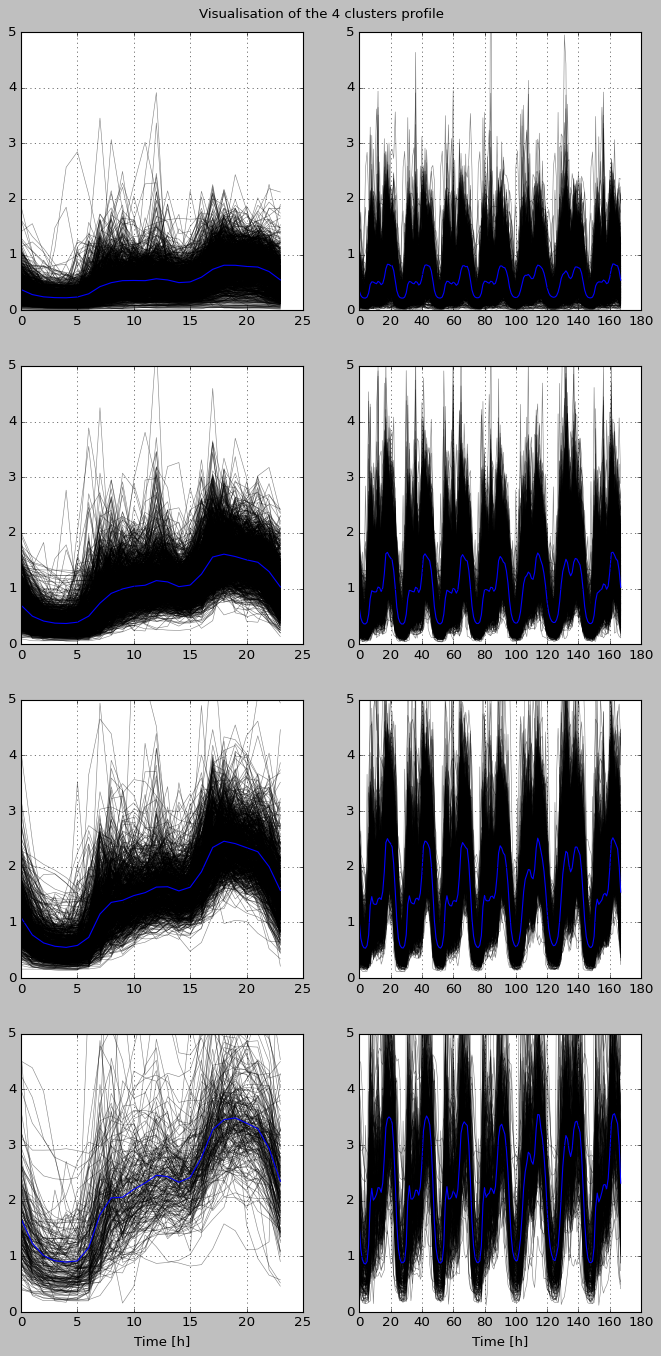

In [44]:
#best_l = 1
#best_wav_func = 'db8'
#x_dwt = multi_level_dwt(x, wav_func=best_wav_func, level=best_l)
n_components = 10
n_cluster = 4
t = time.time()
x_pca = PCA(n_components=n_components).fit_transform(x_season)
kmeans = KMeans(n_clusters=n_cluster, random_state=0).fit(x_pca)
print(f'Time to cluster the dataset {time.time()-t:.2f} s.')
plot_clusters(x, kmeans.predict(x_pca))